In [1]:
import numpy as np
import matplotlib.pyplot as plt
from homework_functions import example_f, centered_diff, error_1, error_2, dat_reader
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Times New Roman'


In [2]:
# boundary conditions
left = (0,0)
right = (1,2)

In [3]:
# exact solution
exact_x, exact_u  = centered_diff(left, right, 10**4, example_f)

In [4]:
exact_x, exact_u = dat_reader('solutionA_N10000.dat')

In [5]:
# test

N_values = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
h_values = []
error1_values = []
error2_values = []

for N in N_values:
    x, u = centered_diff(left, right, N, example_f)
    h_values.append(1/(N+1))
    error1_values.append(float(error_1(x,u,exact_x, exact_u)))

    error2_values.append(float(error_2(x,u,exact_x, exact_u,N)))

Big E alpha = 1.530578716881674
Small e alpha = 2.5578420548148557


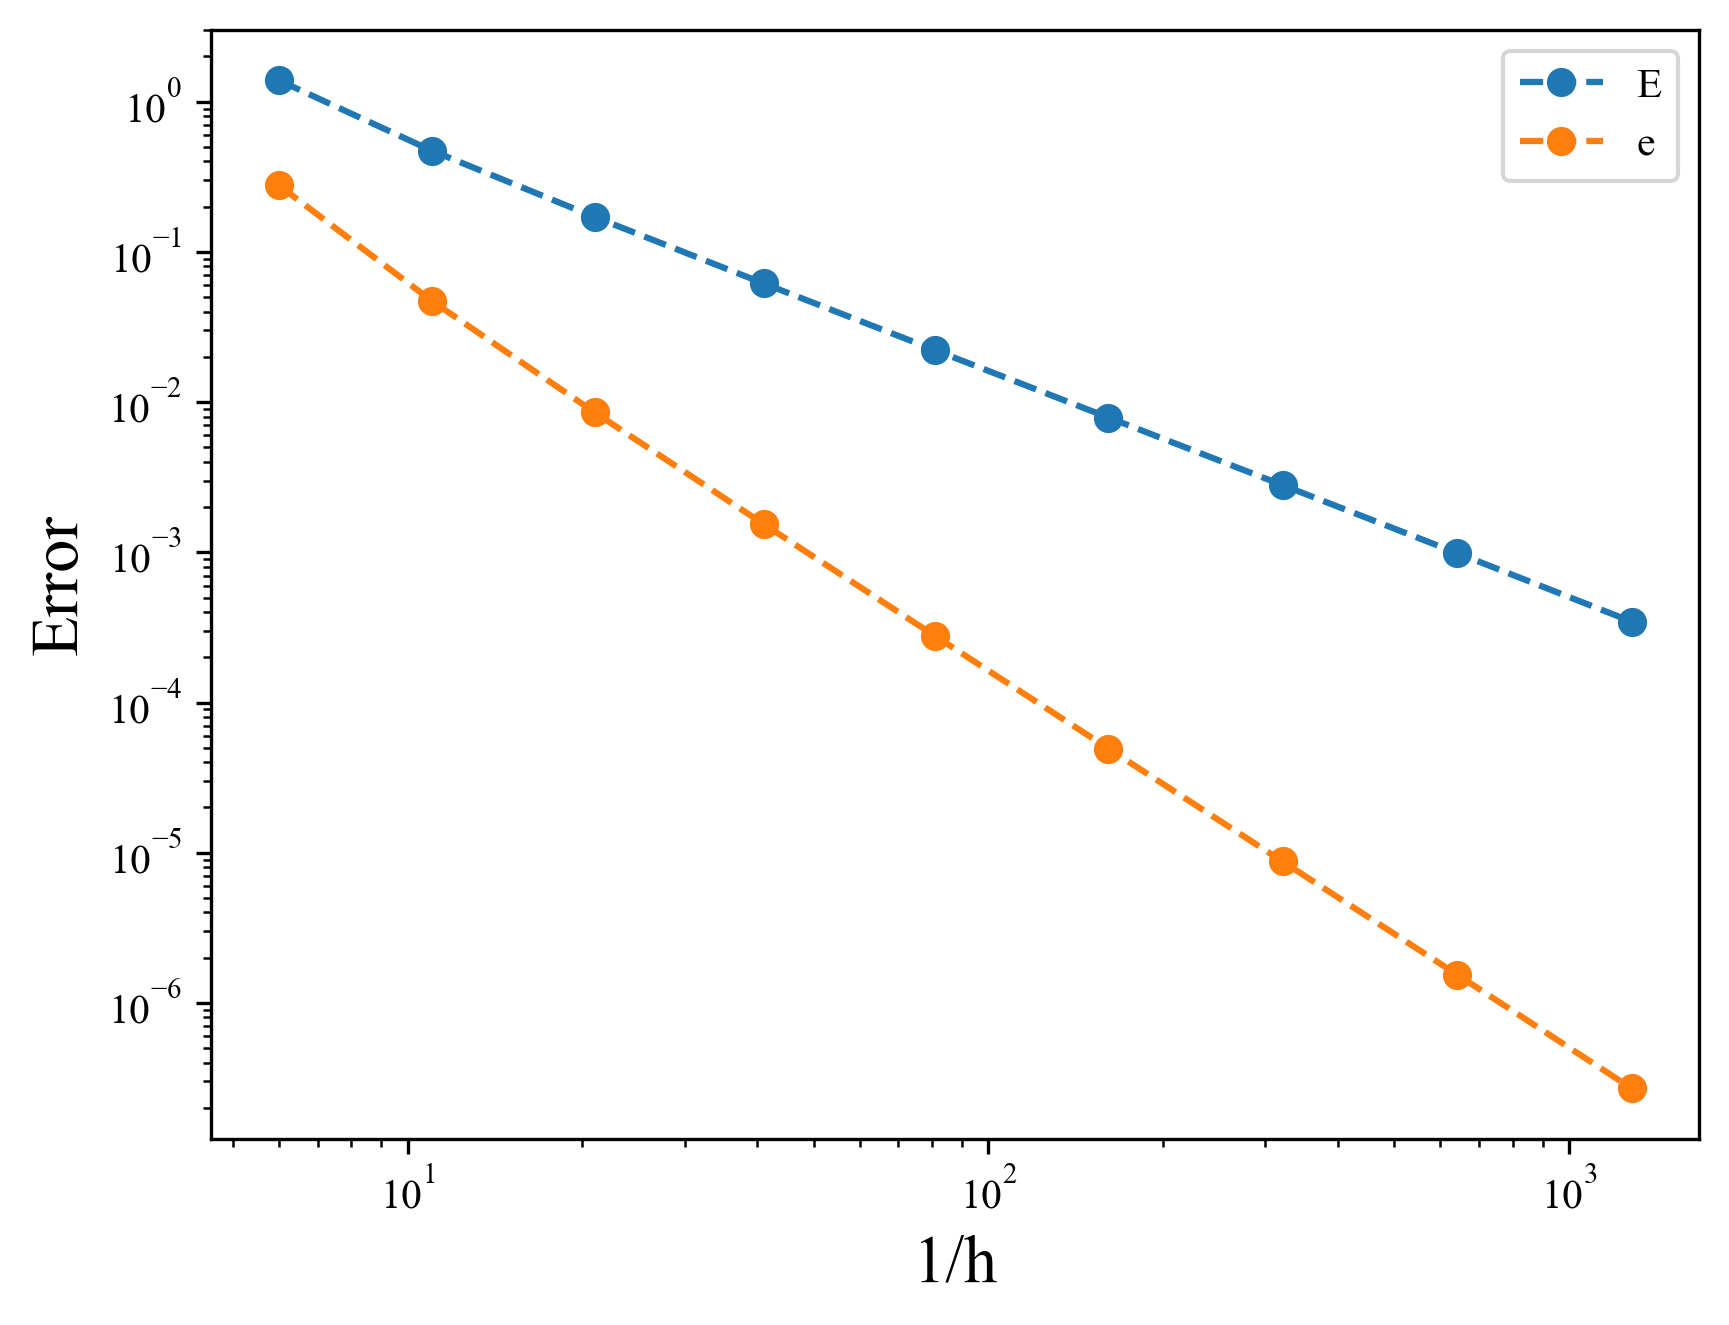

In [10]:
# curve_fiting
alpha_1, log_C_1 = np.polyfit(np.log(h_values),np.log(error1_values), deg = 1)
alpha_2, log_C_2 = np.polyfit(np.log(h_values),np.log(error2_values), deg = 1)

print(f'Big E alpha = {alpha_1}')
print(f'Small e alpha = {alpha_2}')


x_axis = [1/h for h in h_values]
plt.loglog(x_axis,error1_values, '--o', label = 'E')
plt.loglog(x_axis,error2_values, '--o', label = 'e')

plt.xlabel("1/h", fontsize = 16)
plt.ylabel("Error", fontsize = 16)

plt.legend()